In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/kaggle/input/yield-dataset/yield_df.csv')

In [6]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df.shape

(28242, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [10]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [11]:
df.duplicated().sum()

2310

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [15]:
df = df.drop(to_drop)

In [16]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [17]:
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(np.float64)

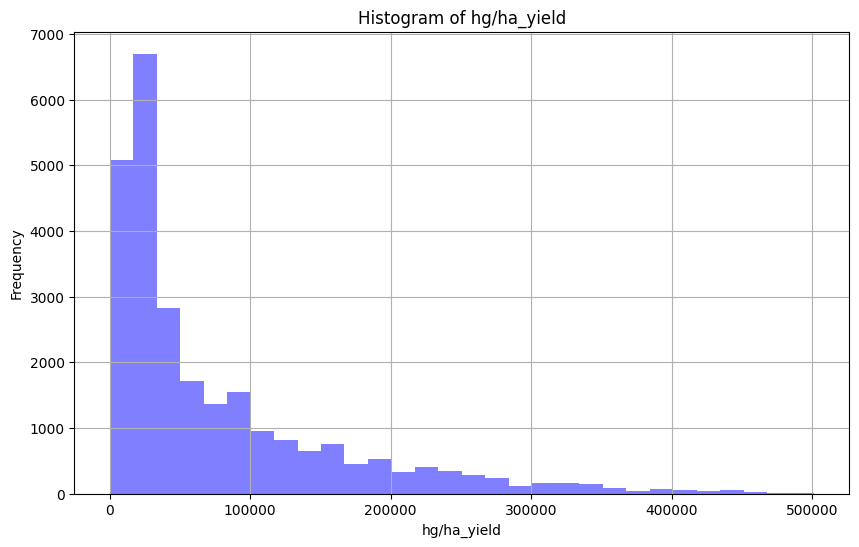

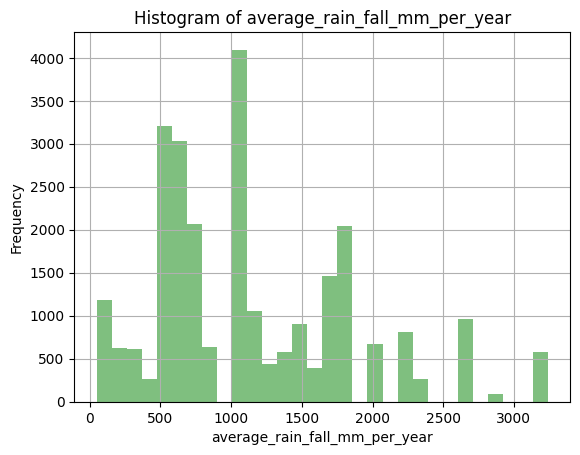

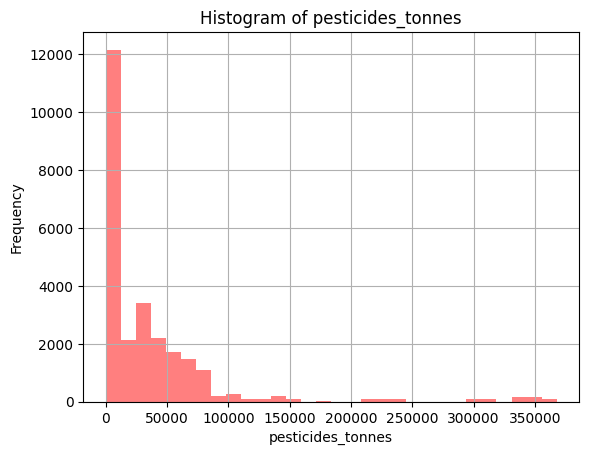

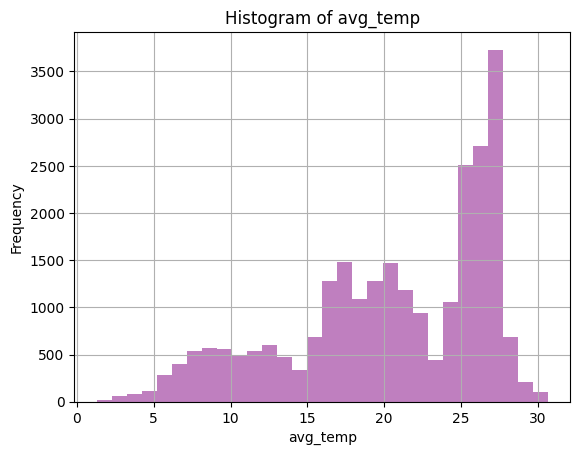

In [18]:
plt.figure(figsize=(10, 6))

# Histograms
df['hg/ha_yield'].hist(bins=30, alpha=0.5, color='blue')
plt.title('Histogram of hg/ha_yield')
plt.xlabel('hg/ha_yield')
plt.ylabel('Frequency')
plt.show()




df['average_rain_fall_mm_per_year'].hist(bins=30, alpha=0.5, color='green')
plt.title('Histogram of average_rain_fall_mm_per_year')
plt.xlabel('average_rain_fall_mm_per_year')
plt.ylabel('Frequency')
plt.show()




df['pesticides_tonnes'].hist(bins=30, alpha=0.5, color='red')
plt.title('Histogram of pesticides_tonnes')
plt.xlabel('pesticides_tonnes')
plt.ylabel('Frequency')
plt.show()


df['avg_temp'].hist(bins=30, alpha=0.5, color='purple')
plt.title('Histogram of avg_temp')
plt.xlabel('avg_temp')
plt.ylabel('Frequency')
plt.show()

In [19]:
len(df['Area'].unique())

101

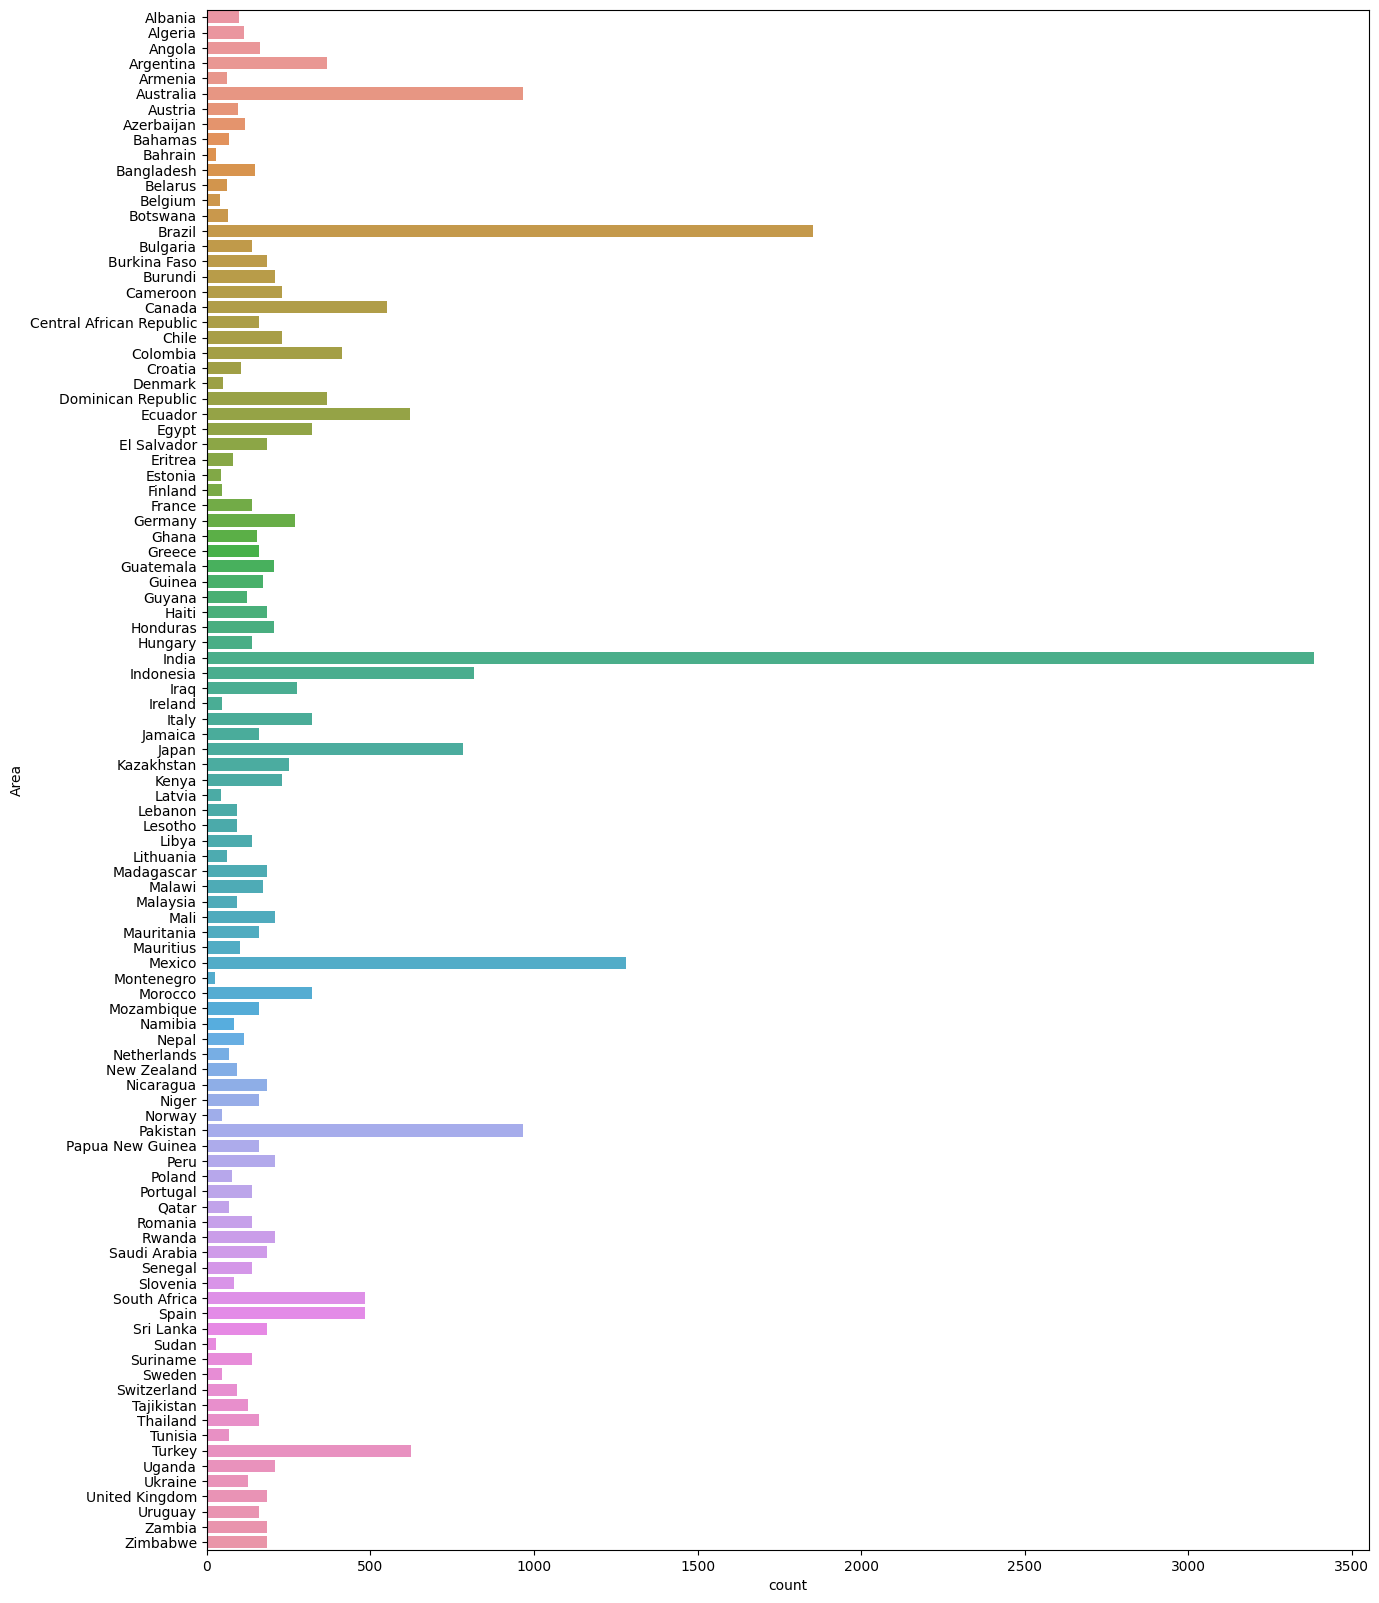

In [20]:
plt.figure(figsize=(15,20))
sns.countplot(y=df['Area'])
plt.show()

In [21]:
(df['Area'].value_counts() < 500).sum()

91

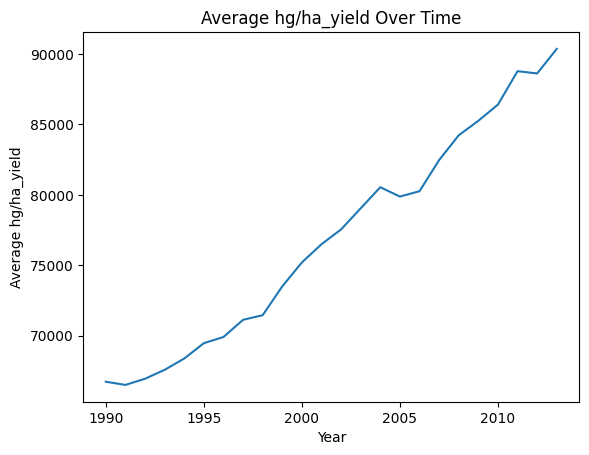

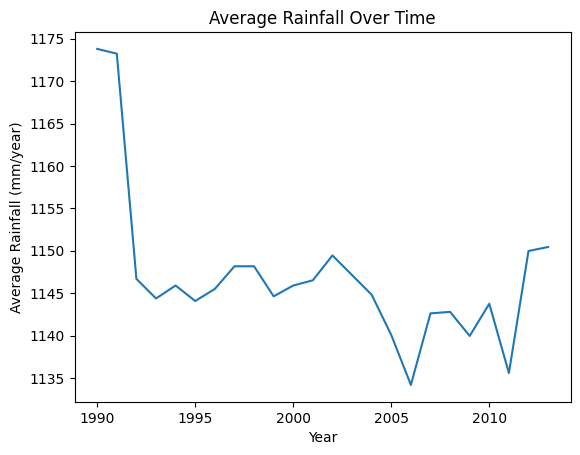

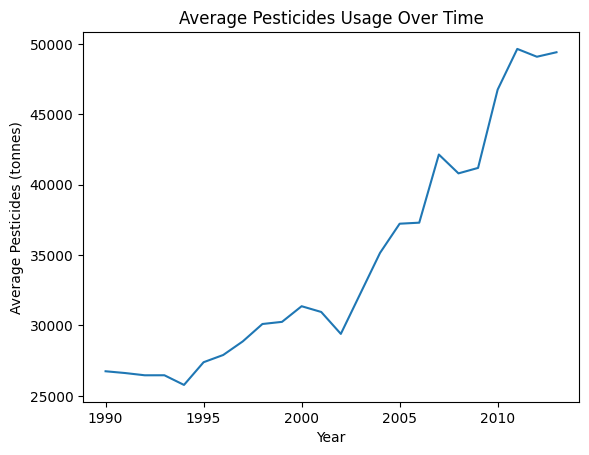

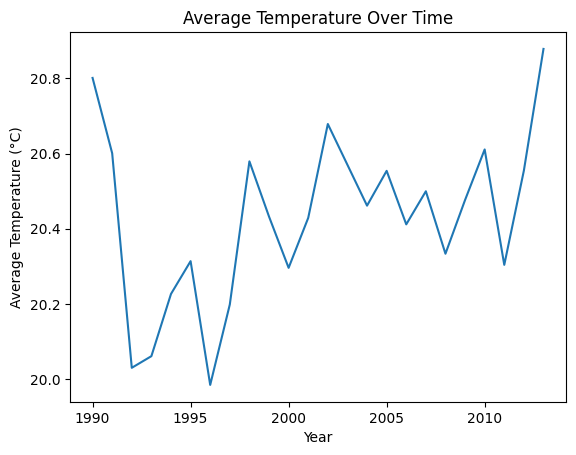

In [22]:
# Time Series Analysis
df.groupby('Year')['hg/ha_yield'].mean().plot()
plt.title('Average hg/ha_yield Over Time')
plt.xlabel('Year')
plt.ylabel('Average hg/ha_yield')
plt.show()

df.groupby('Year')['average_rain_fall_mm_per_year'].mean().plot()
plt.title('Average Rainfall Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rainfall (mm/year)')
plt.show()

df.groupby('Year')['pesticides_tonnes'].mean().plot()
plt.title('Average Pesticides Usage Over Time')
plt.xlabel('Year')
plt.ylabel('Average Pesticides (tonnes)')
plt.show()

df.groupby('Year')['avg_temp'].mean().plot()
plt.title('Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.show()

In [23]:
#Yield Per Country
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())


In [24]:
df['hg/ha_yield'].sum()

1996196943

In [25]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

<Axes: >

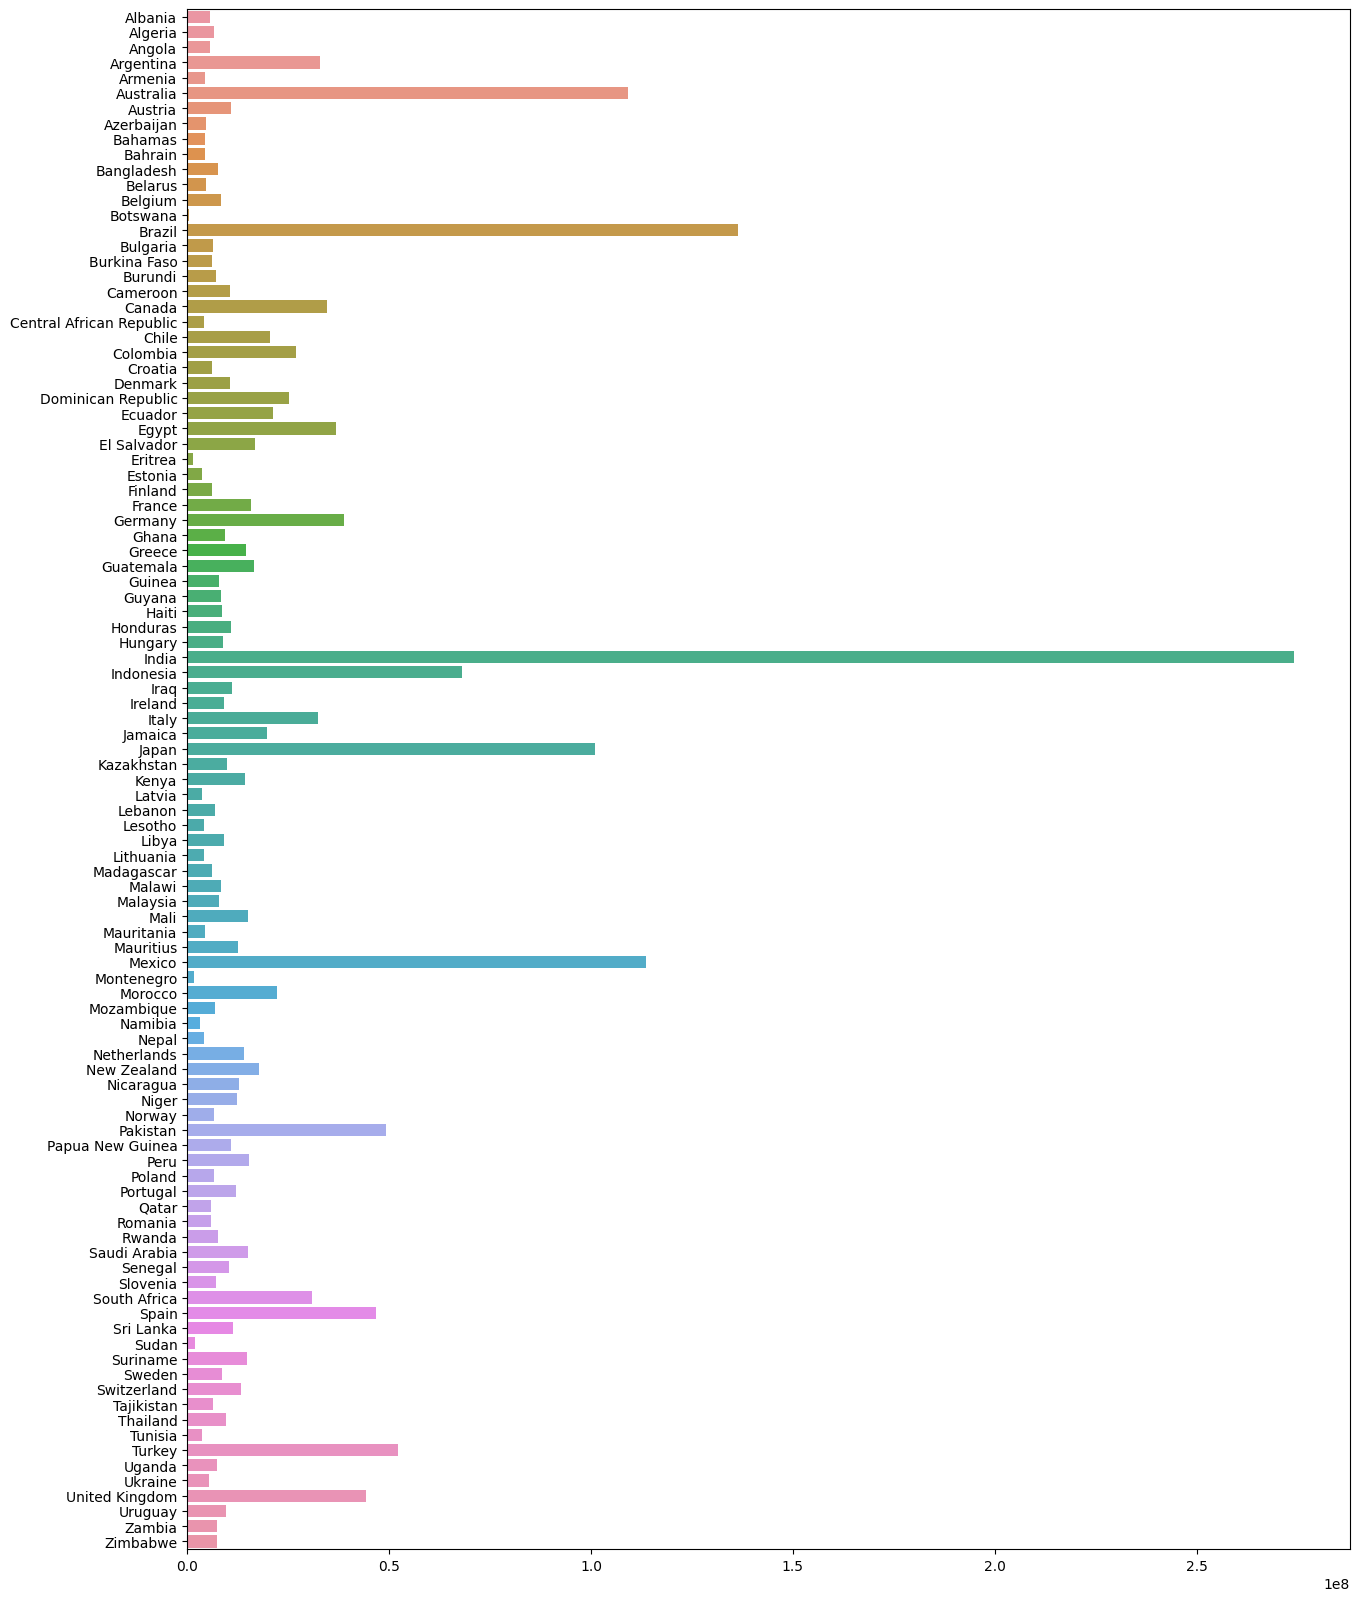

In [26]:
plt.figure(figsize=(15, 20))
sns.barplot(y=country, x=yield_per_country)

<Axes: xlabel='count', ylabel='Item'>

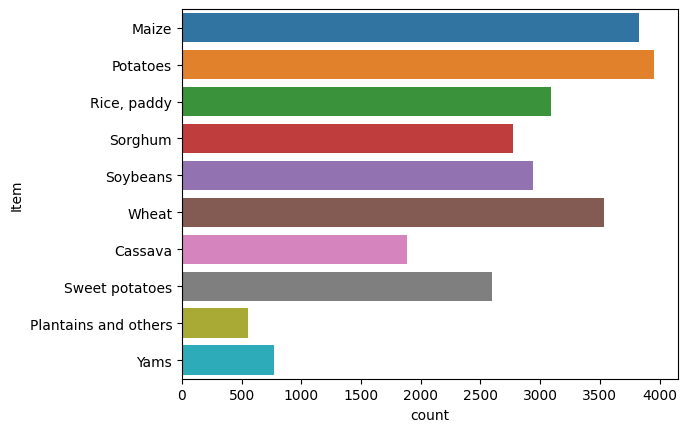

In [27]:
sns.countplot(y=df['Item'])

In [28]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

<Axes: >

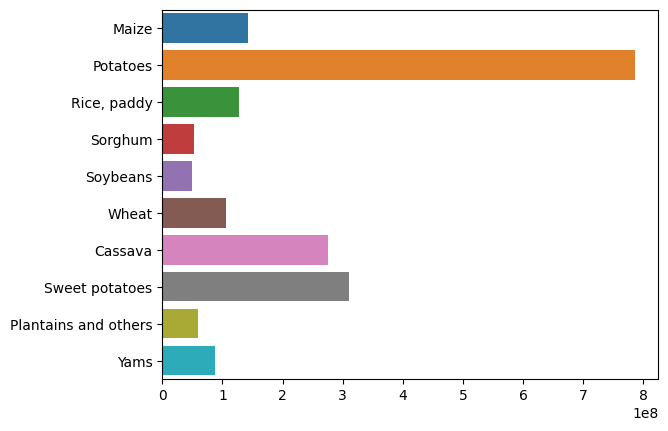

In [29]:
sns.barplot(y=crops,x=yield_per_crop)

In [ ]:
# Train Test To Split Model
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
df.head(3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

In [ ]:
# Converting Categorical to Numerical and Scaling the Values
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0, 1, 2, 3]),
            ('OHE', ohe, [4, 5]),
        ],
        remainder='passthrough'
)

In [ ]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [ ]:
preprocesser.get_feature_names_out(col[:-1])

In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score


models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'Rid':Ridge(),
    'Dtr':DecisionTreeRegressor()
}
for name, md in models.items():
    md.fit(X_train_dummy,y_train)
    y_pred = md.predict(X_test_dummy)
    
    print(f"{name} : mae : {mean_absolute_error(y_test,y_pred)} score : {r2_score(y_test,y_pred)}")

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
# Encode categorical variables
label_encoder_area = LabelEncoder()
df['Area'] = label_encoder_area.fit_transform(df['Area'])

label_encoder_item = LabelEncoder()
df['Item'] = label_encoder_item.fit_transform(df['Item'])

# Define features and target variable
X = df.drop(columns=['hg/ha_yield'])
y = df['hg/ha_yield']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Initialize models
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
random_forest_regressor = RandomForestRegressor(random_state=42)
gradient_boosting_regressor = GradientBoostingRegressor(random_state=42)

# Fit the models
decision_tree_regressor.fit(X_train, y_train)
random_forest_regressor.fit(X_train, y_train)
gradient_boosting_regressor.fit(X_train, y_train)

# Evaluate the models
models = [decision_tree_regressor, random_forest_regressor, gradient_boosting_regressor]
model_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting']

for model, name in zip(models, model_names):
    mse, r2 = evaluate_model(model, X_test, y_test)
    print(f'{name} - MSE: {mse:.4f}, R^2: {r2:.4f}')

Decision Tree - MSE: 203846997.8893, R^2: 0.9719
Random Forest - MSE: 121479944.8812, R^2: 0.9832
Gradient Boosting - MSE: 1350113863.1027, R^2: 0.8137


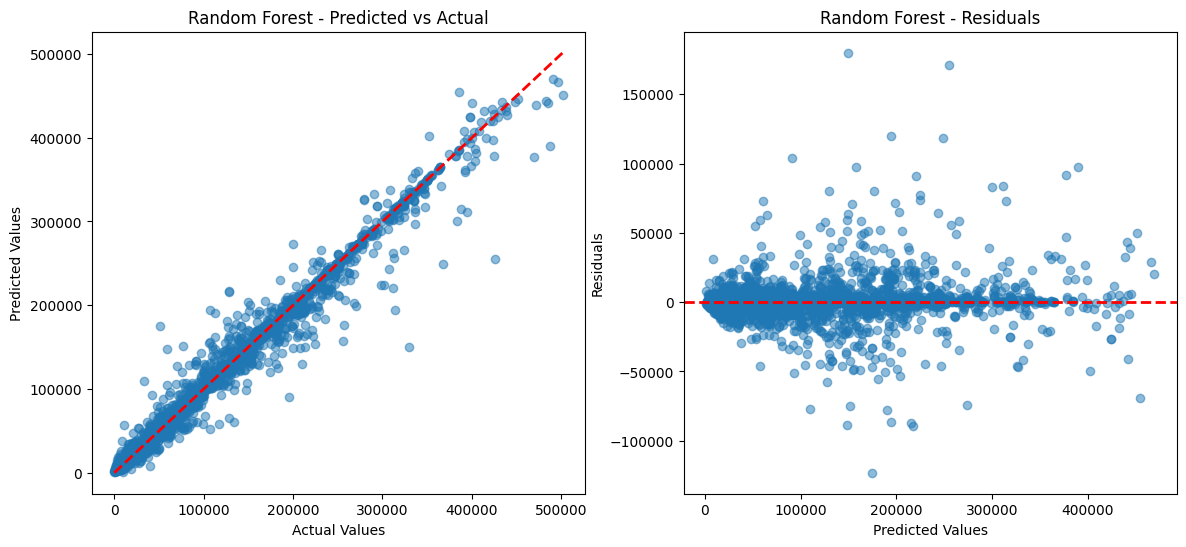

Random Forest - MSE: 122268935.0055, R²: 0.9831


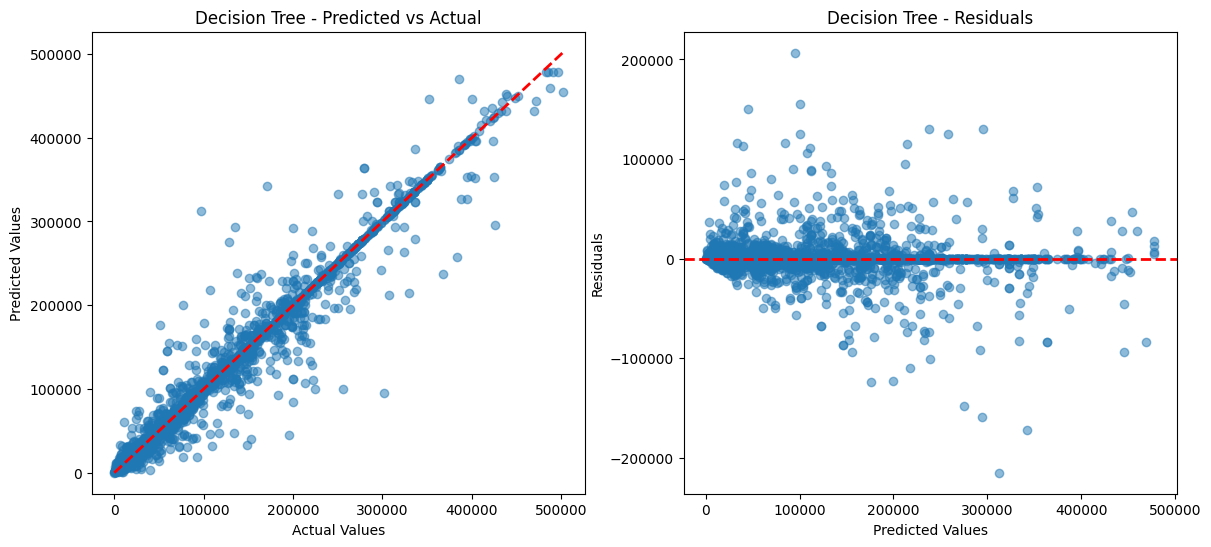

Decision Tree - MSE: 203846997.8893, R²: 0.9719


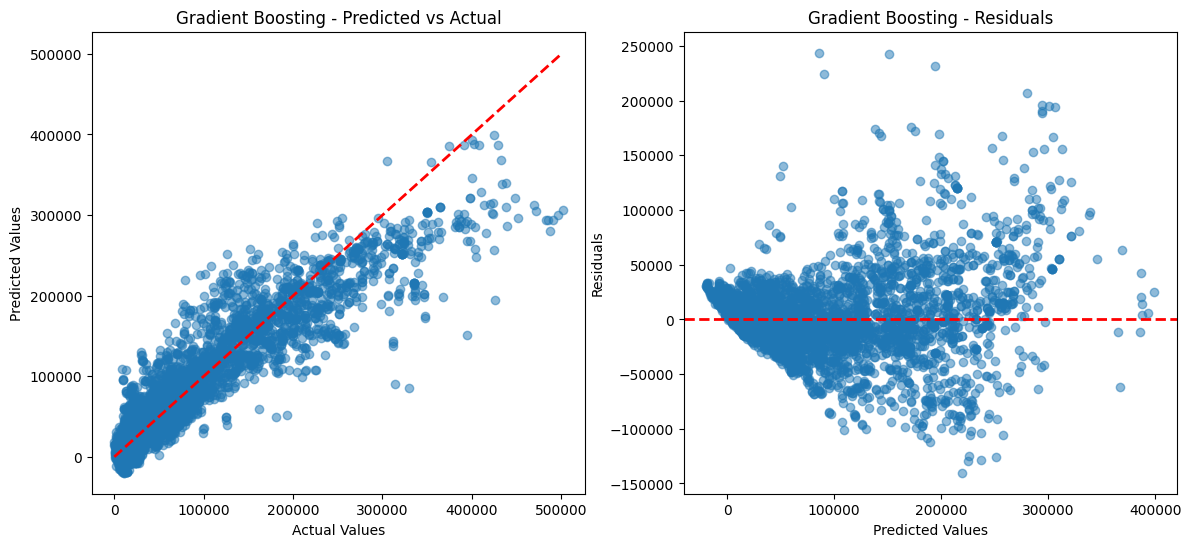

Gradient Boosting - MSE: 1051507224.7210, R²: 0.8549


In [45]:
# Function to plot evaluation metrics
def plot_evaluation_metrics(model_name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    #  Predicted vs Actual values plot 
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} - Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

    #  Residuals plot 
    residuals = y_test - y_pred
    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{model_name} - Residuals')
    plt.axhline(y=0, color='r', linestyle='--', lw=2)

    plt.show()

    # Print MSE and R² Score
    print(f'{model_name} - MSE: {mse:.4f}, R²: {r2:.4f}')

# Random Forest
rf = RandomForestRegressor(random_state=42, n_estimators=200)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
plot_evaluation_metrics('Random Forest', y_test, y_pred_rf)

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
plot_evaluation_metrics('Decision Tree', y_test, y_pred_dt)

# Gradient Boosting
gb = GradientBoostingRegressor(random_state=42, n_estimators=200)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
plot_evaluation_metrics('Gradient Boosting', y_test, y_pred_gb)